# Algo.2 Decision tree
--- 
The decision tree distill data in to knowledge. with this, we can take a set of unfamiliar data and extract a set of rules which are often comparable to those given by human expert.
There are three section in this chaptre:
- methods to construct a tree(recursion)
- metrics of measuring the algo's success
- building a classifier and matplotlib it

## procedures:
___
- collect: any method
- prepare: the decision tree need nominal values, so continuous values will need to be quantized.
- analyse: any
- train : construct a tree data structure
- test : error rate
- use : any supervised learning. OFTEN trees are used to better understand the data.

___

## 1. tree Generation(D,A)

```
IF every item in the dataset is in the same class then:
    return the class label
Else choose the best feature to split the data
     split the data
     create a branch node
         for each node, call self.func and add result to branch node
         stop condition : - all instances have the same class (leaf node)
                          - run out all the feature, take a majority vote                        
return branch node


```

```
definition :
attribute/feature（the property used to split the dataset）, value (the value of attribute for one instance), label(class label of instance) 

* Important * the nesting dictionary forms the structure of tree：

                            tree{key: value }, here is tree{a*, {value1, value2,value3 ...}} ,
                            where a* is choosen feature and each value is relative subdataset
                            tree = {attr_i:{}}  
                            tree[best_ft_label][value] = new_tree(split(dataset, bestft, value), sub_attri) 
                                          (value here is to add new to dict)
                                            
                            output : {'no surfacing': {0: '0'}}
```

![Decision_tree](decision_tree.png)

### calculate the Shannon entropy of a dataset
k : class label indice.  Ent: entropy ( the higher entropy, the more mixed up the data is)
$$ Ent(D) = - \sum_{k=1}^{\| y \|} p_k log_2 p_k $$
* to calculate entropy, we ONLY need the labels and not the dataset
#### informaton gain(C3.5)


$$ Gain(D,a) = Ent(D) - \sum_{v=1}^{V} \frac {D^v}{D} Ent(D^v)$$
$$choosen \quad feature : a^* = \underset{a \in A}{\arg\min} Gain(D,a) $$

#### Geni impurity (CART)

In [1]:
import decision_tree
import numpy as np
dataset = [[1,1,'yes'],[1,1,'yes'],[1,0,'no'],[0,1,'no'],[0,0,'no']]
attribute = ['no surfacing','flippers']
tree1 = decision_tree.decision_tree(dataset,attribute)

In [2]:
print('the entropy of the above dataset is %f' % tree1.ent(tree1.dataset))    #%d %f %s

the entropy of the above dataset is 0.970951


### Dataset splitting on a given feature


In [3]:
dt=tree1.split(tree1.dataset,0,1)
dt

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [4]:
# select the best feature:
indice = tree1.ft_eval(tree1.dataset) 
print('the best feature to split the above dataset is: %d' %indice)

the best feature to split the above dataset is: 0


In [5]:
tree1.set_tree(tree1.new_tree(tree1.dataset,tree1.attribute))
tree1.tree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

___
## 2. Matplotlib tree plotting

### plotting tree nodes with text annotations

In [6]:
import matplotlib.pyplot as plt
from treePlotter import *

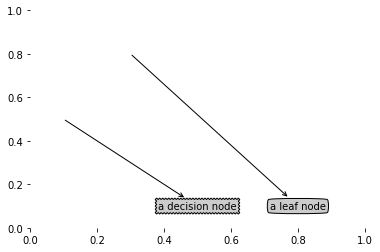

In [7]:
# drawbox setting by default
createPlot1()

### construction a tree of annotations
to properly size the plot, we should know:
```
X direction : how many leaf nodes : getNumLeafs
Y direction : how many levels (depth) :getTreeDepth
```

In [8]:
#pull out a predifined tree for testing.
myTree = retrieveTree(1)
myTree

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [9]:
getTreeDepth(tree1.tree)

2

In [10]:
getNumLeafs(tree1.tree)

3

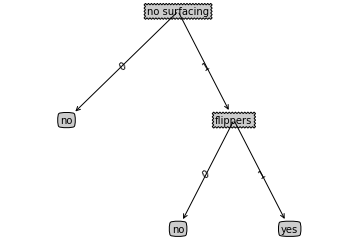

In [11]:
createPlot(tree1.tree)

___

## 3. Testing and storing the clasisfier 

In [12]:
tree1.tree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [13]:
tree1.attribute

['no surfacing', 'flippers']

In [14]:
inX =[1,1]
print('the predicted label for test vector inX is : %s' % tree1.predict(tree1.tree,inX,tree1.attribute))

the predicted label for test vector inX is : yes


In [15]:
# write in byte format into local disc. IMPORTANT : the file is stored in byte format.
tree1.store_tree()

![new_tree.txt](tree_store.png)

In [16]:
# reload the tree from local disc
tree2 = decision_tree.decision_tree([],"")
tree2.grab_tree('new_tree.txt')
tree2.tree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## 4. Example : predict contact lens type

In [17]:
with open('lenses.txt','r') as fr:
    lenses_dataset = [instance.strip().split('\t') for instance in fr.readlines()]
    lenses_attri = ['age', 'prescipt','astigmatic','tear_rate']

# plot dataset format
lenses_dataset

[['young', 'myope', 'no', 'reduced', 'no lenses'],
 ['young', 'myope', 'no', 'normal', 'soft'],
 ['young', 'myope', 'yes', 'reduced', 'no lenses'],
 ['young', 'myope', 'yes', 'normal', 'hard'],
 ['young', 'hyper', 'no', 'reduced', 'no lenses'],
 ['young', 'hyper', 'no', 'normal', 'soft'],
 ['young', 'hyper', 'yes', 'reduced', 'no lenses'],
 ['young', 'hyper', 'yes', 'normal', 'hard'],
 ['pre', 'myope', 'no', 'reduced', 'no lenses'],
 ['pre', 'myope', 'no', 'normal', 'soft'],
 ['pre', 'myope', 'yes', 'reduced', 'no lenses'],
 ['pre', 'myope', 'yes', 'normal', 'hard'],
 ['pre', 'hyper', 'no', 'reduced', 'no lenses'],
 ['pre', 'hyper', 'no', 'normal', 'soft'],
 ['pre', 'hyper', 'yes', 'reduced', 'no lenses'],
 ['pre', 'hyper', 'yes', 'normal', 'no lenses'],
 ['presbyopic', 'myope', 'no', 'reduced', 'no lenses'],
 ['presbyopic', 'myope', 'no', 'normal', 'no lenses'],
 ['presbyopic', 'myope', 'yes', 'reduced', 'no lenses'],
 ['presbyopic', 'myope', 'yes', 'normal', 'hard'],
 ['presbyopic', 

In [18]:
# the features for classification
lenses_attri

['age', 'prescipt', 'astigmatic', 'tear_rate']

In [19]:
#define a new tree
lenses = decision_tree.decision_tree(lenses_dataset,lenses_attri)
#construct the tree structure by dataset
lenses.set_tree(lenses.new_tree(lenses.dataset,lenses.attribute)) #no return

In [20]:
#self.tree trained tree structure 
lenses.tree

{'tear_rate': {'normal': {'astigmatic': {'yes': {'prescipt': {'myope': 'hard',
      'hyper': {'age': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}}}},
    'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescipt': {'myope': 'no lenses', 'hyper': 'soft'}},
      'young': 'soft'}}}},
  'reduced': 'no lenses'}}

#### Decision tree generated by the ID3 algorithm

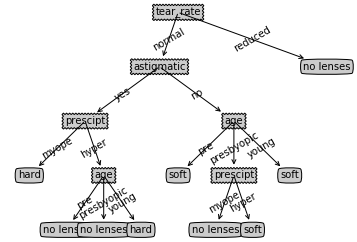

In [21]:
#plot tree using matplotlib
createPlot(lenses.tree)